In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 평균이동(Mean Shift)

## 평균이동 개요

- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행


- 중심을 `데이터가 모여 있는 밀도가 가장 높은 곳`으로 이동시킴
    - K-평균은 중심에 소속된 데이터의 평균거리 중심으로 이동
    
    
- 데이터의 분포도를 이용해 군집 중심점을 찾음


- 군집 중심점은 데이터 포인트가 모여있는 곳으로 생각하고 `확률밀도함수(probability density function)`를 이용
    - 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
    - 주어진 모델의 확률 밀도 함수를 찾기 위해서 `KDE(Kernel Density Estimation)`을 이용
    

### 평균이동 방법
    
- 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수값으로 입력한 뒤, 그 반환값을 현재 위치에서 업데이트하며 이동하는 방식
- 이 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾음

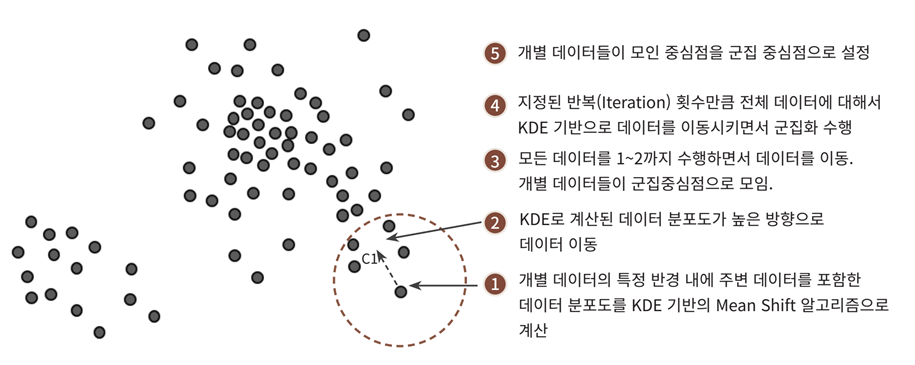

**KDE(Kernel Density Estimation)**
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

    - 확률 밀도 함수(Probability Density Estimation)
        - 확률 변수의 분포

- 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정
- 대표적인 커널 함수 : 가우지안(Gaussian) 분포 함수

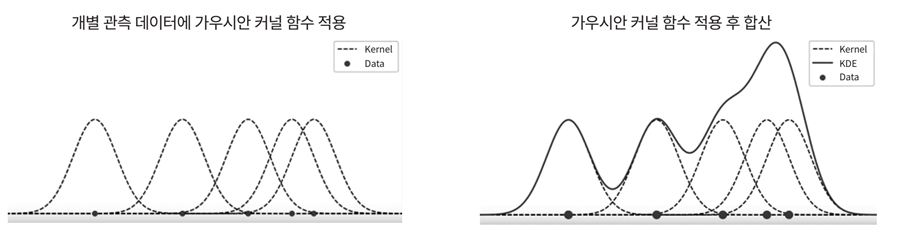

**커널 함수식**
- $K$ : 커널 함수, $x$ : 확률변수값,  $x_i$ : 관측값, $h$ : 대역폭

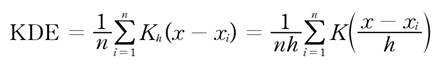

- 대역폭 $h$는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(smoothing)하는데 적용
- h값 크기에 따라 확률밀도 추정 성능을 좌우하게 됨
    - h값이 작을수록 과대적합(overfitting)을 하기 쉬움
    - h값이 클수로 과도하게 평활화된 KDE로 지나치게 단순화되어 과소적합(underfitting)하기 쉬움
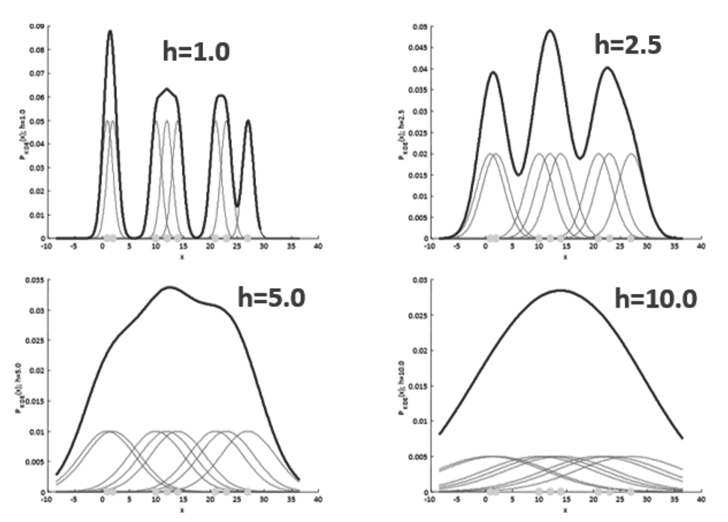
- 적절한 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 매우 중요함

### 평균 이동 군집화와 대역폭의 관계
- **`대역폭이 클수록`** 평활화된 KDE로 **`적은 수의 군집 중심점`**을 가짐
- **`대역폭이 작을수록` `많은 수의 군집 중심점`**을 가짐

### 사이킷런의 평균 이동 군집화 클래스 MeanShift

**MeanShift(bandwidth)**
- bandwidth : KDE의 대역폭 h와 동일


**estimate_bandwidth() 함수**
- 최적의 대역폭 계산 함수

### 예제
- make_blobs()을 이용하여 cluster_std가 0.7로 정한 3개 군집 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘 적용

In [2]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

In [3]:
x,y, = make_blobs(n_samples= 200, n_features= 2, centers= 3, cluster_std= 0.7, random_state= 0)

- bandwidth= 0.8인 경우

In [4]:
meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(x)

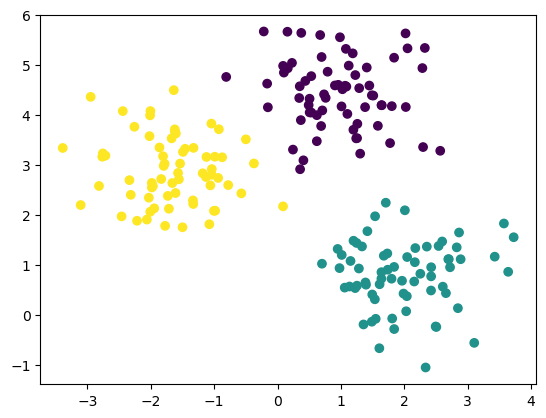

In [5]:
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

In [8]:
# return_counts= True 빈도 개수 반환
np.unique(cluster_labels, return_counts= True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([57, 60, 51, 15, 10,  7], dtype=int64))

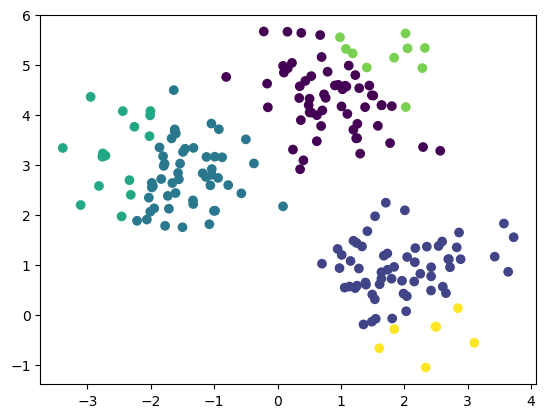

In [9]:
plt.scatter(x[:,0], x[:,1], c= cluster_labels)
plt.show()

- bandwidth를 1로 높여 평균 이동 군집화 수행

군집: [0 1 2], 군집별 자료수: [67 67 66]


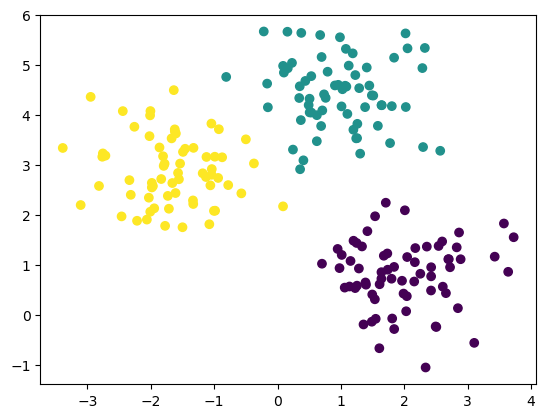

In [12]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(x)
cat, cnt = np.unique(cluster_labels, return_counts= True)
print(f'군집: {cat}, 군집별 자료수: {cnt}')
plt.scatter(x[:,0], x[:,1], c= cluster_labels)
plt.show()

bandwidth = 1.2로 지정

-- band_width= 0.8인 경우 --
군집: [0 1 2 3 4 5], 군집별 자료수: [57 60 51 15 10  7]


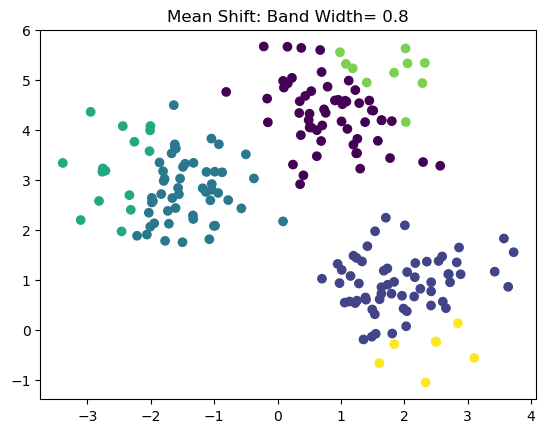

-- band_width= 1인 경우 --
군집: [0 1 2], 군집별 자료수: [67 67 66]


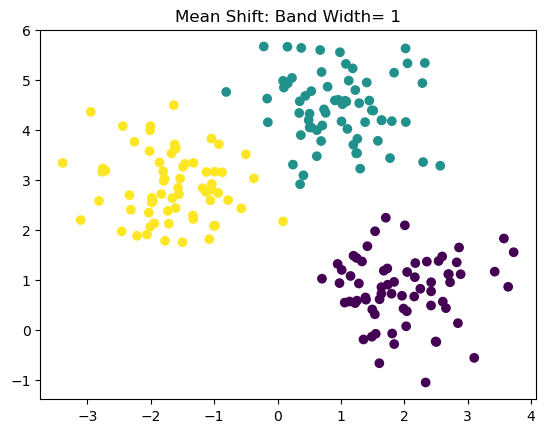

-- band_width= 1.2인 경우 --
군집: [0 1 2], 군집별 자료수: [67 67 66]


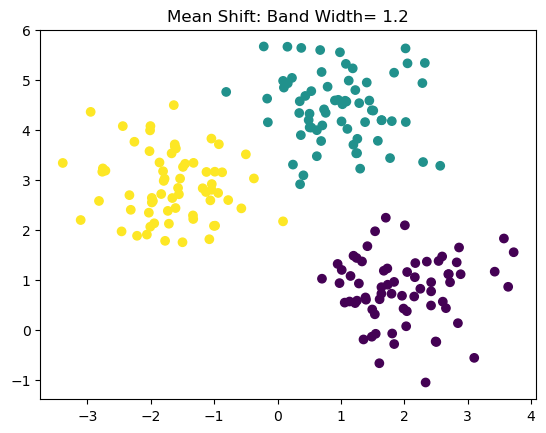

-- band_width= 2인 경우 --
군집: [0 1 2], 군집별 자료수: [66 67 67]


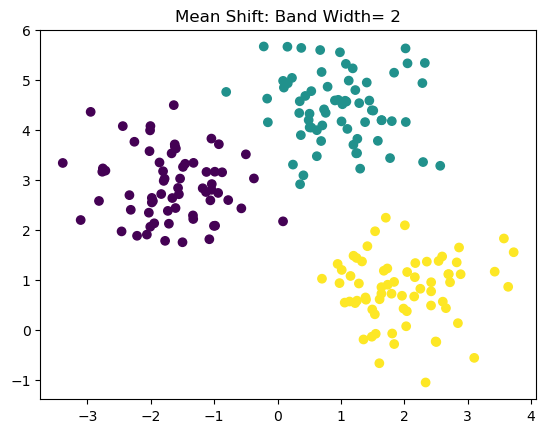

-- band_width= 3인 경우 --
군집: [0], 군집별 자료수: [200]


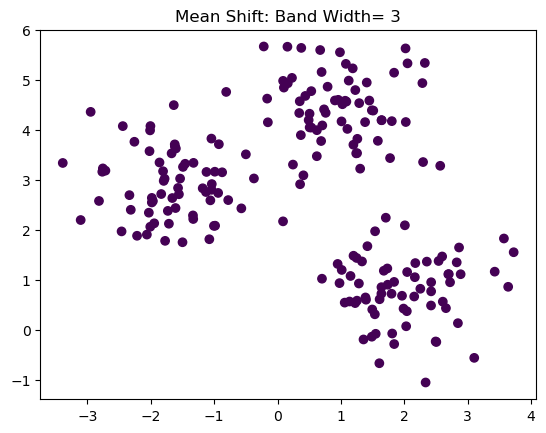

In [16]:
for bw in [0.8, 1, 1.2, 2, 3]:
    meanshift = MeanShift(bandwidth= bw)
    cluster_labels = meanshift.fit_predict(x)
    cat, cnt = np.unique(cluster_labels, return_counts= True)
    print(f'-- band_width= {bw}인 경우 --')
    print(f'군집: {cat}, 군집별 자료수: {cnt}')
    plt.scatter(x[:,0], x[:,1], c= cluster_labels)
    plt.title(f'Mean Shift: Band Width= {bw}')
    plt.show()

### 적절한 bandwidth를 찾기 위한 함수 : estimate_bandwidth()

In [17]:
from sklearn.cluster import estimate_bandwidth

- 적정한 bandwidth를 계산하여 이를 적용한 평균 이동 군집화 수행 

In [20]:
best_bw = estimate_bandwidth(x)
meanshift = MeanShift(bandwidth= best_bw)
cluster_labels = meanshift.fit_predict(x)
cat, cnt = np.unique(cluster_labels, return_counts= True)
print(f'-- band_width= {best_bw:.2f}인 경우 --')
print(f'군집: {cat}, 군집별 자료수: {cnt}')

-- band_width= 1.82인 경우 --
군집: [0 1 2], 군집별 자료수: [67 67 66]


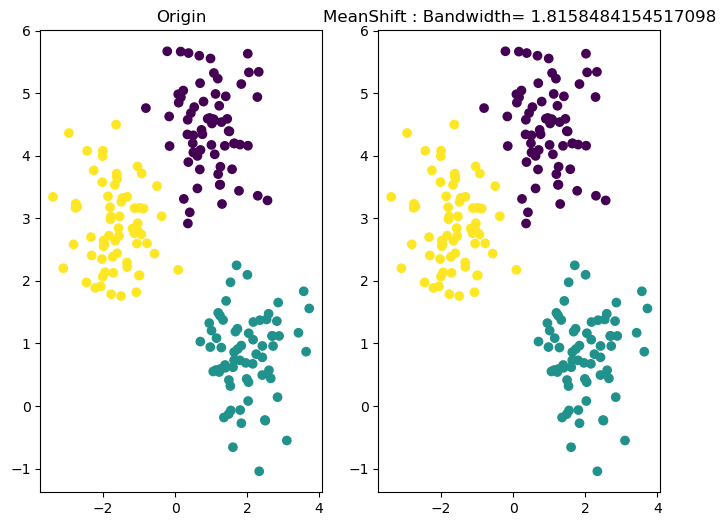

In [21]:
fig, ax = plt.subplots(figsize=(8,6), ncols= 2)
ax[0].scatter(x[:,0], x[:,1], c= y)
ax[0].set_title('Origin')
ax[1].scatter(x[:,0], x[:,1], c= cluster_labels)
ax[1].set_title(f'MeanShift : Bandwidth= {best_bw}')
plt.show()

### 구성된 3개의 군집 시각화

In [22]:
cluster_df = pd.DataFrame(x, columns= ['x1','x2'])
cluster_df['target'] = y
cluster_df['MeanShift'] = cluster_labels
cluster_df.head(3)

,x1,x2,target,MeanShift
0,-1.671737,3.534007,2,2
1,0.732732,4.413232,0,0
2,1.084733,4.568501,0,0


**MeanShift의 cluster_centers_**

In [23]:
meanshift.cluster_centers_

array([[ 0.91576801,  4.43718522],
       [ 1.93418334,  0.80590247],
       [-1.67292851,  2.87796673]])

**군집 결과 시각화: 군집 중심과 군집별 마커 표시**

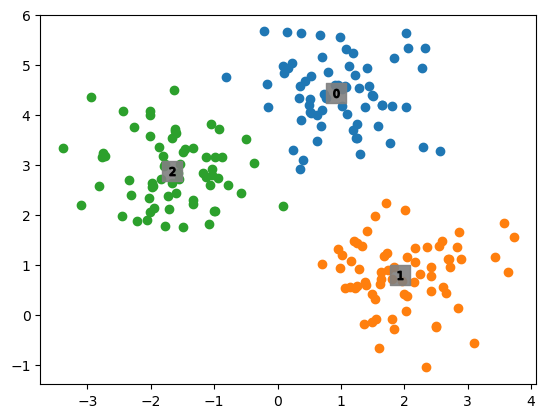

In [27]:
labels = np.unique(cluster_labels)
centers = meanshift.cluster_centers_
markers = ['o','s','^','x','*']
for label in labels:
    cluster = cluster_df[cluster_df['MeanShift'] == label]
    plt.scatter(x= cluster.x1, y= cluster.x2)
    plt.scatter(centers[label][0], centers[label][1],color='gray', s= 200, marker= 's', alpha=0.9)
    plt.scatter(centers[label][0], centers[label][1], color='k',marker= '$%d$'%label)
plt.show()

- target 값과 군집 label 값 비교

In [29]:
cluster_df.groupby('target')['MeanShift'].value_counts()

target  MeanShift
0       0            67
1       1            67
2       2            66
Name: count, dtype: int64

### 평균 이동 군집화의 장단점
**장점**
- 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않으므로 좀 더 유연한 군집화가 가능함
- 이상치의 영향력이 크지 않음
- 미리 군집의 개수를 정할 필요가 없음

**단점**
- 알고리즘 수행 시간이 오래 걸림
- bandwidth의 크기에 따른 군집화 영향도가 매우 큼


### 평균이동 군집화 활용 분야
- 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 더 많이 사용됨
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 뛰어난 역할을 수행하는 알고리즘

----